
***
# <center>R2.09 - Méthodes numériques <center> <br> TP2 - A siege of herons<center>
***
***
Le but de ce TP est d'effectuer une étude complète d'une suite définie par récurrence, et en particulier les suites de Héron
***
***


In [1]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt

#magic
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

## 1 - Présentation d'une suite $u_{n+1} = f(u_n)$ "jouet"


Soit $f : \mathbb{R} \to \mathbb{R} \:  x \mapsto -\frac{x^2}{4}  + x +\frac12  $,

et $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 1, u_{n+1} = f(u_n)$

>**Question 1**
>Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures.


In [28]:
def f(x):
    valeur = -x**2/4+x+1/2
    return(valeur)  

print(f(2))
print(f(1))

def un(n):
    u = 1

    for i in range (n):
        u = (f(u)) 
    
    return(u)
    

1.5
1.25


[1, 0.5, 1.25, 1.5, 1.25, 0.5, -0.75, -2.5, -4.75, -7.5]


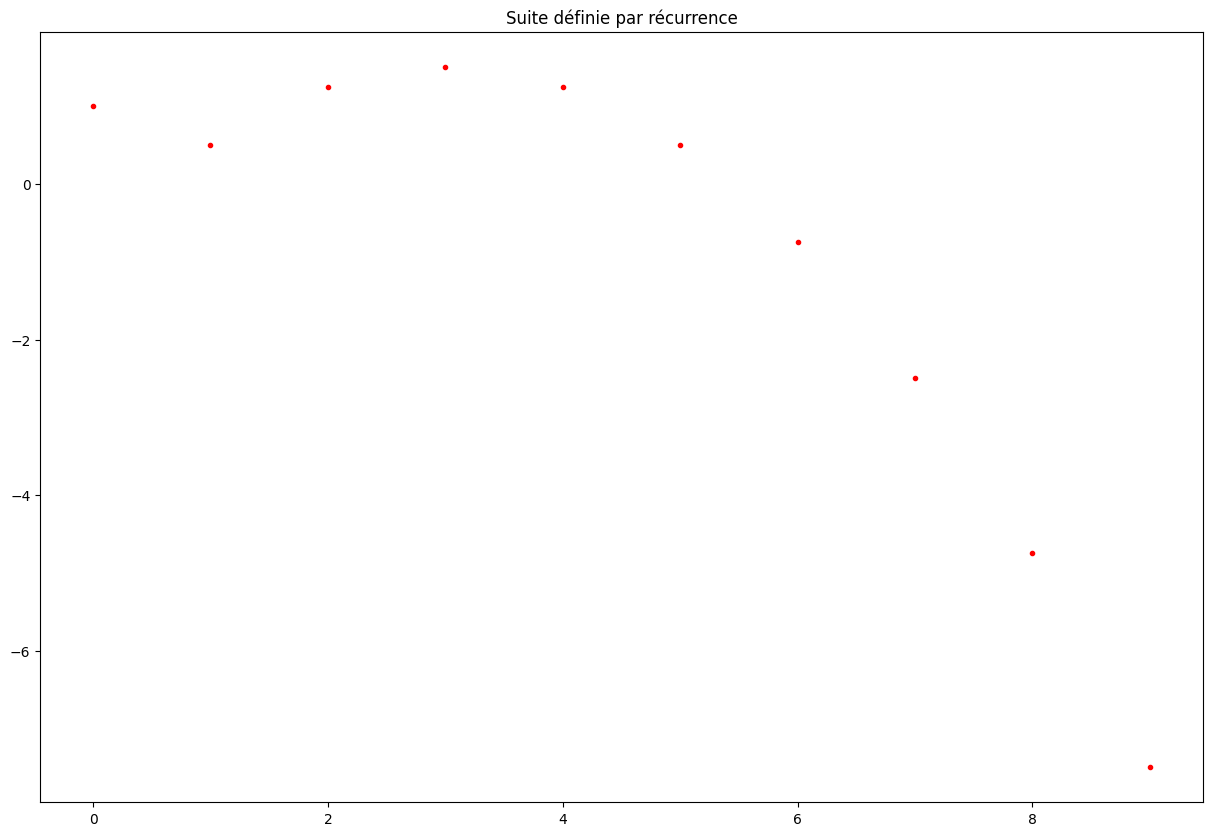

In [25]:
rg = range(0, 10)
s1 = [un(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite définie par récurrence')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()

###### <tt> Quelques fonctions utiles </tt>

On se donne deux petites fonctions utiles pour visualiser les suites définie par récurrence.

 - La méthode <tt>subdivision</tt> permet de couper un intervalle $[a,b]$ en $n$ morceaux de tailles égales (à noter de numpy possède une fonction <tt>np.linespace</tt> faisant cela)
 - La méthode <tt>escalier</tt> trace $(u_n)$ selon le "diagramme escargot".

In [16]:
def subdivision(a, b, n):
    d = (b - a) / n
    return [a + k * d for k in range(n + 1)]

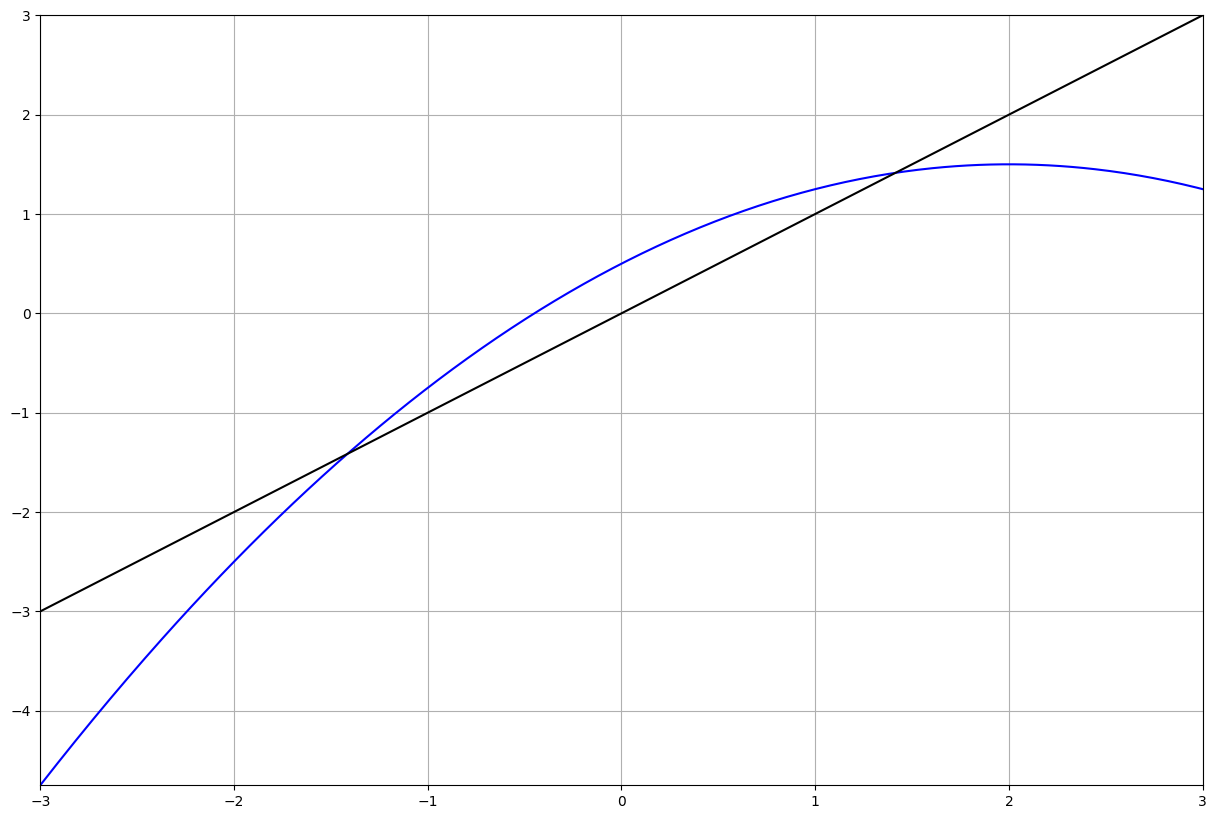

In [17]:
a=-3
b=3
xs = subdivision(a,b, 400)
plt.axis([a, b, min(a,f(a),f(b)), max(b,f(b),f(a))])
plt.plot(xs, [f(x) for x in xs], 'b')
plt.plot(xs, xs, 'k')
plt.grid()
plt.show()

In [18]:
#Les paramètres a, b, c, et d représentent les extrémités d'affichage du graphe.
#x0 est la valeur initiale de la suite et n le nombre d'étapes.

def escalier(f, a, b, c, d, x0, n):
    # Listes permettant l'affichage du graphe de f
    xs = subdivision(a, b, 200)
    ys = [f(x) for x in xs]
    
    pad = 0.
    plt.axis([a - pad, b + pad, c - pad, d + pad])
    plt.plot(xs, ys, 'b')
    plt.plot(xs, xs, 'k')
    
    # Position du terme initial de la suite
    x = x0
    coul = 'r'
    plt.plot([x0, x0], [0, f(x0)], coul)
    
    # Affichage de "l'escargot"
    for k in range(n):
        plt.plot([x, f(x)], [f(x), f(x)], coul)
        plt.plot([f(x), f(x)], [f(x), f(f(x))], coul)
        
        x = f(x)
    plt.grid()


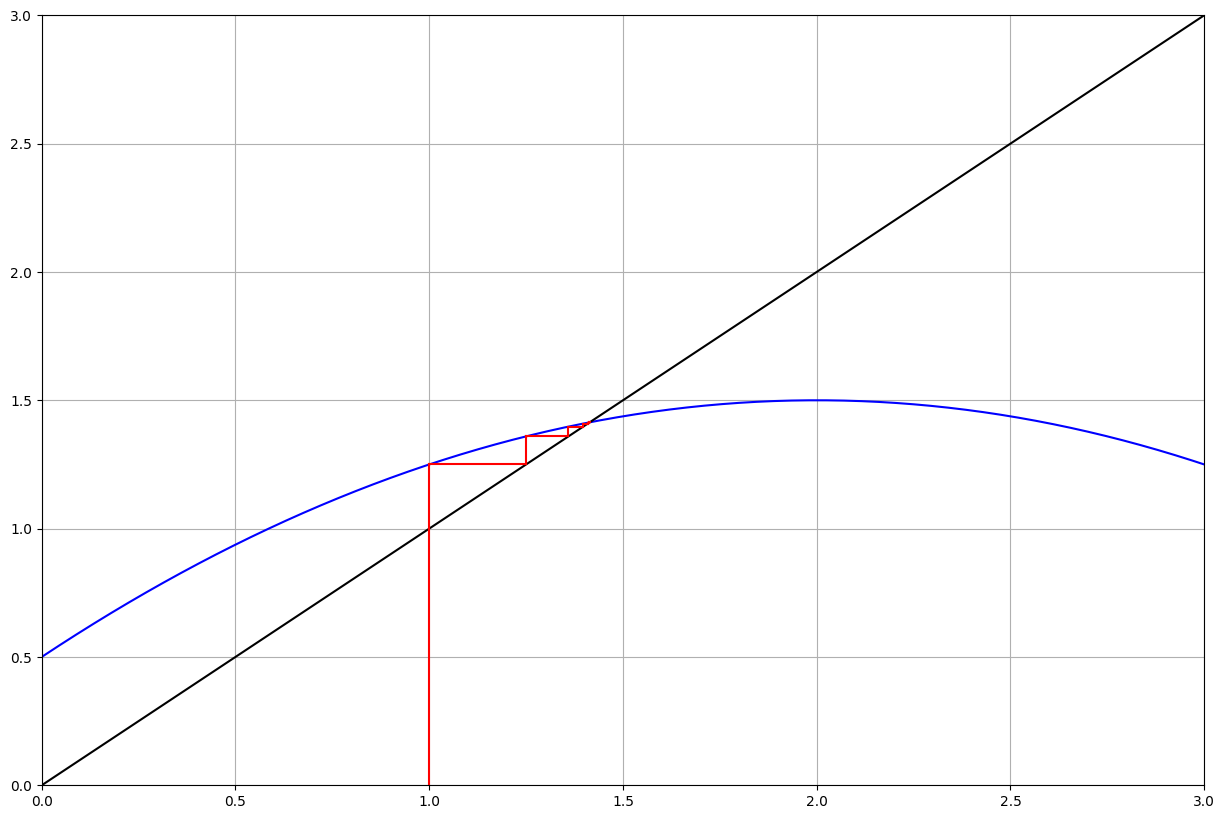

In [19]:

escalier(f, 0, 3, 0, 3, 1, 50)


>**Question 2** 
>
> - Montrer que $f$ est une fonction croissante sur $[0,2]$
> - En déduire que la suite $(u_n)_n$ est croissante



f'(x) = 1-(x/2).
On a la suite f'(x) qui est positif donc f(x) est croissant

Concernant la suite (un) comme la suite est reccurente et on a f croissant.
On a U1 = f(1) = -1/4+1+1/2 
= 1.25 > 1
Donc U1 >= U0
Donc (un) est croissante




>**Question 3**
>
> - Trouver un intervalle $I$ stable par $f$
> - En déduire que la suite $(u_n)_n$ est bornée


Tous les $I\subset [0,2]$ conviennent

Grâce au tableau de variation on a : f([0;2]) = [0.5;1.5]
Fonc [0;2] est stable par f.
On a U0 appartient [0;2] qui est stable par f donc (Un) est borné entre 0 et 2


>**Question 4**
>
> - En déduire que la suite $(u_n)_n$ convergente
> - Quelle est sa limite $\ell$ ?
 

On cherche la solution de $f(\ell) = \ell$, donc $\ell$ est une racine de $g : x \mapsto -\frac{x^2}{4} +x - \frac12 -x  = -\frac{x^2}{4}- \frac12 $

$\Delta = b^2 -4ac = \frac12$

$\ell_- = -\sqrt{2} \approx -1.414$


$\ell_+ = \sqrt{2} \approx 1.414$

$(u_n)_n$ étant croissante, majorée par $2$, elle converge forcément vers $\ell_+$


Or Racine de 2 appartient à [0;2] donc lim Un = Racine de 2 lorsque n->+infini

## 2 - Suite de Héron $u_{n+1} = f(u_n)$
### 2.a - Premier exemple

Soit $g : \mathbb{R} \to \mathbb{R} \quad  x \mapsto \frac{x + \frac{2}{x}}{2}    $,


la suite de Héron est définie par : $(u_n)_{n \in \mathbb{N}}$ la suite définie par $u_0 = 2, u_{n+1} = f(u_n)$

>**Question 1**
>Définir la fonction $f$ et la suite $(u_n)_n$ en python. Tracer les premiers termes et proposer des conjectures.


In [38]:
def g(x):
    valeur = (x+(2/x))/2
    return(valeur)

def hn(n):
    u = 2

    for i in range (n):
        u = (g(u)) 
    
    return(u)

print(g(5))

2.7


[2, 1.5, 1.4166666666666665, 1.4142156862745097, 1.4142135623746899, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095]


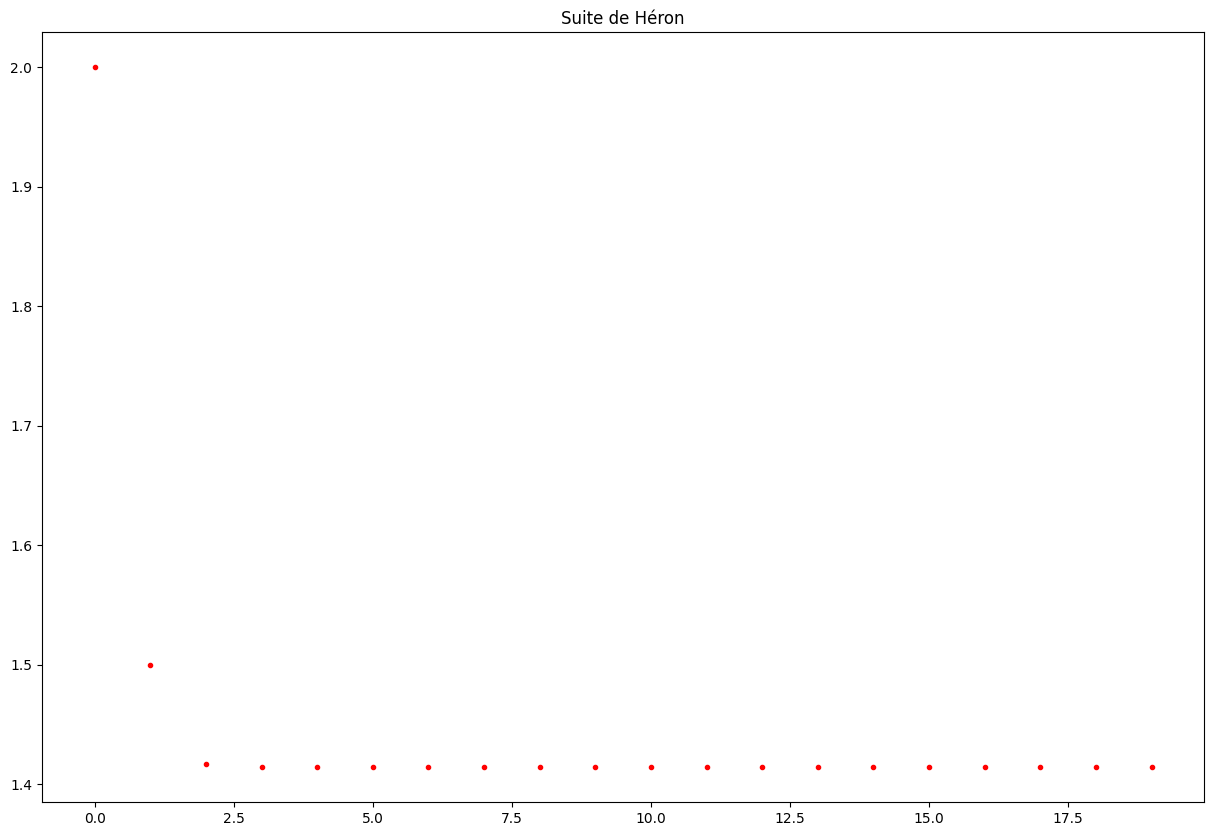

In [39]:
rg = range(0, 20)
s1 = [hn(n) for n in rg]
#plt.axis([0, 20, 0, 3])

print(s1)

plt.title('Suite de Héron')
plt.plot(rg, s1, 'ro', markersize=3)
plt.show()


> - F est croissante continue
> - [0;2] est stable par f
> - Un+1 = f(un)
> - (Un) est croissante
> - Donc (Un) converge vers l telle que l = f(l)
> - Trouvons L

1.4375

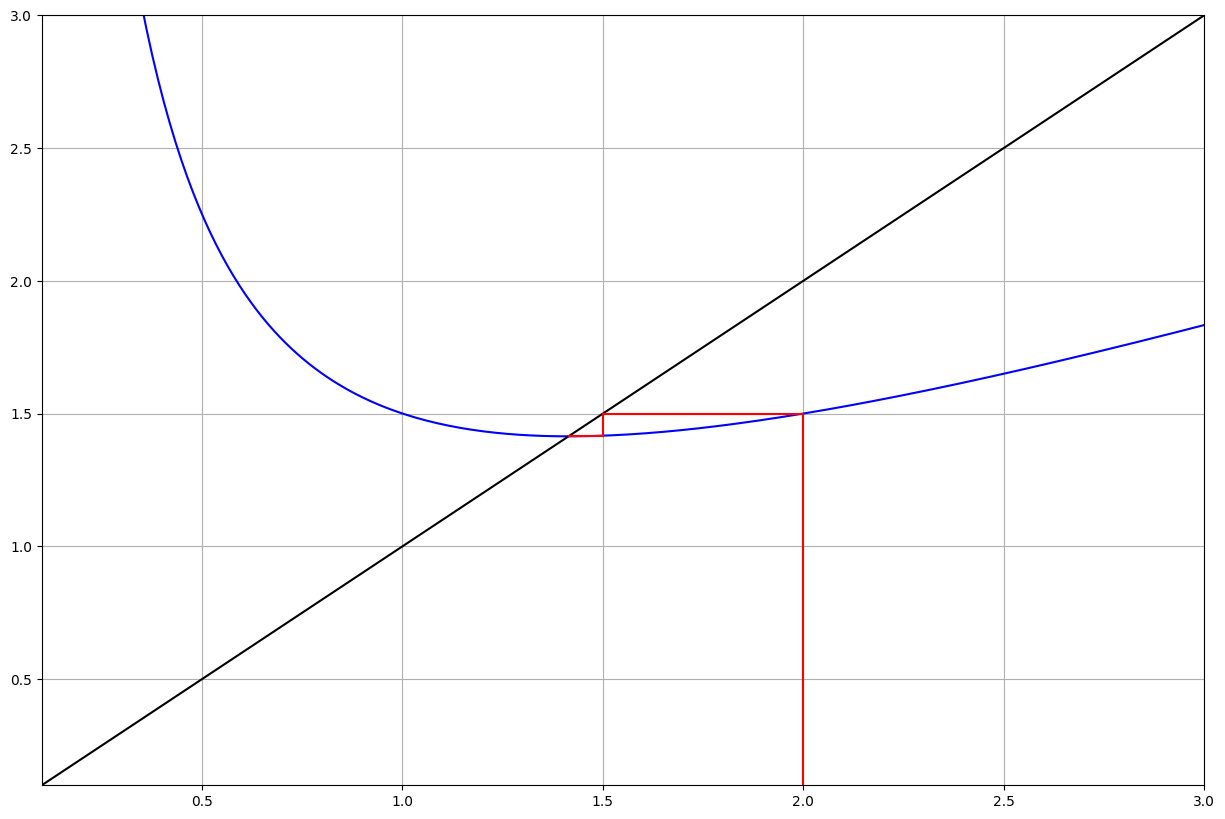

In [40]:
escalier(g, 0.1, 3, 0.1, 3, 2, 50)
f(1.5)

>**Question 2** 
>
> - Étudier les variation de $f$
> - Trouver un intervalle $I$ stable par $f$



### 2.b - Quelques autres suites de Héron
On défini des **suites de Héron**, notées $(h[A]_n)_n$, par :

$$ h[A]_0 = A ; h[A]_{n+1} \frac{h[A]_{n} + \frac{A}{h[A]_{n}}}{2} $$ 

> **Question 3** Conjecturer (et prouver) les limites en fonction de $A \in \mathbb{N}$ des suites $(h[A]_n)_n$. (Pour vous aider dans vos conjectures vous êtes libres de procéder comme dans les questions précédentes.)

In [13]:
def Heron(n,a):
    


Heron(20,2.15)**2

array([4.6225    , 2.480625  , 2.16101667, 2.15001404, 2.15      ,
       2.15      , 2.15      , 2.15      , 2.15      , 2.15      ,
       2.15      , 2.15      , 2.15      , 2.15      , 2.15      ,
       2.15      , 2.15      , 2.15      , 2.15      , 2.15      ])

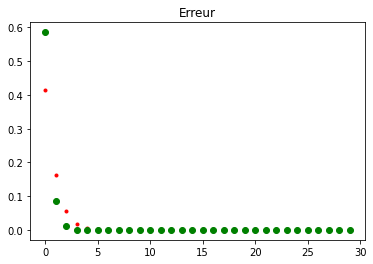

In [14]:
rg = range(0,30)
s1 = [np.abs(np.sqrt(2) -un(n)) for n in rg]
s2 = [np.abs(np.sqrt(2) -hn(n)) for n in rg] 
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.plot(rg, s1, 'ro', markersize=3)
plt.plot(rg, s2, 'go')

plt.show()

*****
*****



## 3 - Point fixe et vitesse de convergence

>**Question 1** 
>
>Écrire un programme <tt>contract_test</tt> qui teste empiriquement si une fonction $f$ est contractante sur un intervalle $[a,b]$ en vérifiant si $|f(x) - f(y)| < |x-y|$ pour de nombreuses valeurs $x,y \in [a,b]$.


In [18]:
def contract_test(f,a,b,k=1000):
    
contract_test(f,1,2)


0.49974999999996506

>**Question 1 bis** 
>
>Écrire un programme <tt>contract_test_deriv</tt> qui teste empiriquement si une fonction $f$ est contractante sur un intervalle $[a,b]$, en calculant une approximation de $f'(x)$ (voir TP2) et en calculant le maximum de cette appreoximation pour de nombreuses valeurs $x \in [a,b]$.
>
>Quelle méthode vous semble la plus efficace entre <tt>contract_test</tt> et <tt>contract_test_deriv</tt>


In [19]:
def contract_test_deriv(f,a,b,k=1000,eps =10**-5):
   
contract_test_deriv(f,1,2)

(0.5000000000032756, 1.0)

>**Question 2** 
>
>En utilisant l'inégalité des accroissement finis, montrer que $f$ est contractante.
>
>
>$f'(x) = \frac{1-\frac{2}{x^2}}{2}$  donc $0 \leq f'(x) \leq 0.5$ donc la fonction est contractante avec facteur de contraction $K= .5$

>**Question 3**
>
>
>
>Tracer la différence $d_n = \ell -u_n$. Combien d'itérations sont nécessaires pour que cette différence soit inférieure à $10^{-4}$
>
>
>$d_n \leq K^n |\ell -u_0|$

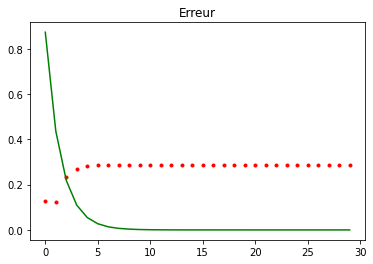

In [20]:
rg = range(0,30)
s1 = [np.abs(5-np.sqrt(15) -un(n)) for n in rg]
s2 = [np.abs(5-np.sqrt(15) -2)*.5**n for n in rg] 
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.plot(rg, s1, 'ro', markersize=3)
plt.plot(rg, s2, 'g')

plt.show()